# Logbook Teresa Scheidt

## Project: Prediction of Staining


## 26.03.2021
__Aim__\
getting started with GitHub and the project

__Description__
- set up Github account and folder for project and main documents for documentation 
- read paper [In Silico Labeling: Predicting Fluorescent Labels in Unlabeled Images](https://pubmed.ncbi.nlm.nih.gov/29656897/)


__Next steps__\
getting familiar with the dataset and existing code

## 30.03.2021
__Aim__\
setting up necessary accounts, getting familiar with virtual staining

__Description__
- set up LUNARC account
- read papers

__Next steps__\
getting familiar with the dataset and existing code


## 01.04.2021
__Aim__\
converting images, get familiar with existing code

__Description__
- convert C01 files to png files with [C01toPNG.py](https://github.com/Aitslab/virtualstain/blob/cd435161990fe8dc6cef47a3bc57b971428a9356/TeresaScheidt/src/C01toPNG.py) (not successfull: no converted files afterwards)
    - data from [zip folder](https://lunduniversityo365.sharepoint.com/sites/CDLAI_EDAN70/Delade%20dokument/virtual%20staining/MFGTMPcx7_170802000001.zip) provided by Sonja in the virtual staining chat on 20210330
- understanding code from AZ project

__Next steps__\
Adapting code and run on example images


## 05.04.2021
__Aim__\
Conversion and Normalization of images

__Description__
- conversion of C01 files to png files with [C01toPNG.py](https://github.com/Aitslab/virtualstain/blob/main/TeresaScheidt/src/C01toPNG.py) in seperate conda enviroment
    - partly successfull: converted images in goal folder, but it's the same image 50 times 
- using mean and std normalization, code can be run in [jupyter notebook](https://github.com/Aitslab/virtualstain/blob/main/TeresaScheidt/src/normalization.ipynb)
    - data from [zip folder](https://lunduniversityo365-my.sharepoint.com/personal/ma8244mi-s_lu_se/Documents/Microsoft%20Teams%20Chat%20Files/Sample_16bitpng_to_Teresa.tar.gz) provided by Mariam in cldai general chat on 20210401
- Problem: converted images are all the same?? 

__Next steps__\
more preprocessing of images\
solve problems with conversion of images


## 06.04.2021
__Aim__
- activate Lunarc account, get familiar with enviroment
- apply batch normalization and check revision of normalization

__Description__
- Lunarc account is active now, no problems with accessing it and the dataset /lunarc/nobackup/projects/snic2020-6-41/Shared_data/Saved_selected_CO1_images/Saved_selected_images
- function for Batch normalization and unnormalization implemented in [preprocessing_functions.py](https://github.com/Aitslab/virtualstain/blob/main/TeresaScheidt/src/preprocessing_functions.py), test runs in [jupyter notebook](https://github.com/Aitslab/virtualstain/blob/main/TeresaScheidt/src/normalization.ipynb):
    - normalization works and unnormalizing gives same images as input images 

__Next Steps__\
adapting Unet and training on small sample of images


## 08.04.2021
__Aim__
- download images from Lunarc
- adapt Unet to images

__Description__
- download 54 images from /lunarc/nobackup/projects/snic2020-6-41/Shared_data/Saved_selected_8bit_images (using WinSCP)
- change input and output layers of Unet (for now only one output channel, change to 2 later) 
- adapt code for Data augmentation (see [training_function.py](https://github.com/Aitslab/virtualstain/blob/main/TeresaScheidt/src/training_functions.py))
    - based on code AZ project (data_provider.py), used function random_sample_generator
    - adapted to my imagesize (only 1 channel) and removed rescaling as my images are already normalized

__Next Steps__\
training of model

## 12.04.2021

__Aim__\
train Unet

__Description__
- try training of adapted Unet (based on model_builder.py from AZ project) 
    - problems with downsizing of images between layers, because of different keras version (solved with setting padding='same')
    - code runs without error, but training stopps after 2 epochs (ran out of data) 
- normalization and training can be run in [initial_model.ipynb](https://github.com/Aitslab/virtualstain/blob/main/TeresaScheidt/src/Initial_model.ipynb)

__Next Steps__\
automated reading of images\
training of model

## 14.04.2021
__Aim__\
fix training error 

__Description__
- training stops after one iteration with error 'WARNING:tensorflow:Your input ran out of data; interrupting training.'
    - tried fixing it by changing variables batch_size, steps_per_epoch, epochs (didn't work) 
    - problem turned out to be in my random_sample_generator (I was missing a while loop)
- Training now runs without problems, but doesn't converge (trained for 10 epochs with 18 d01 images (batch_size 5))

__Next steps__
- make training better (get more images, vary batch_size, learningrate, epochs, ...)
- look at output images
- automated reading of images

Note: no work done for a week because of other deadlines 

## 21.04.2021
__Aim__\
make training better

__Description__
- downloaded 156 16bit images from /lunarc/nobackup/projects/snic2020-6-41/Shared_data/Saved_selected_16bit_images
    - 16bit images have 3 identical channels (?), so I trained the model with 156 d01 images (130 training, 26 validation) 
- trained UNET (in [initial_model.ipynb](https://github.com/Aitslab/virtualstain/blob/main/TeresaScheidt/src/Initial_model.ipynb)) with different hyperparameters, but loss still seems very high (training takes 1 minute per epoch) 

learning_rate| epochs | batch_size | loss/ mse | val_loss/mse
--- | --- | --- | --- | ---
1e-4|15| 13 |  0.6664 | 0.4879 
1e-4 | 15 | 26 | 0.6144 | 0.5198
1e-5 | 15 | 26 | 0.7856 | 0.8096
1e-3 | 15 | 26 | 0.5726 | 0.6060
1e-4 | 15 | 16 | 0.5852 | 0.7176
1e-4 | 50 | 130 | 0.5370 | 0.7279


- evolution of loss (example):

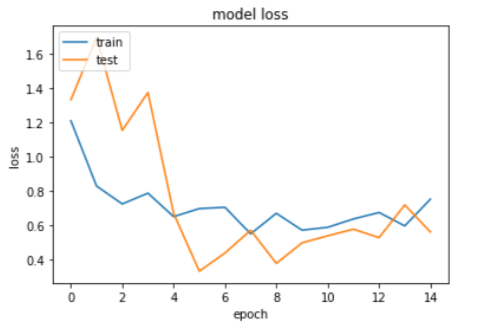

- saved one test model, trained with 15 epochs, batch-size 13  as test_model_d01 (*add path*) 

__Next steps__
- look at output images
- automated reading of images

## 22.04.2021
__Aim__
- looking at output images
- training UNET on D02 images as well

__Description__
- adapted function predict from AZ project
    - only minor changes to to size of input image (1 channel) 
    - code can be found in [prediction.py](https://github.com/Aitslab/virtualstain/blob/main/TeresaScheidt/src/prediction.py)
    - prediction is run in main notebook [initial_model.ipynb](https://github.com/Aitslab/virtualstain/blob/main/TeresaScheidt/src/Initial_model.ipynb)
- output image resembles desired output (definetly not perfect, but ok for first model):
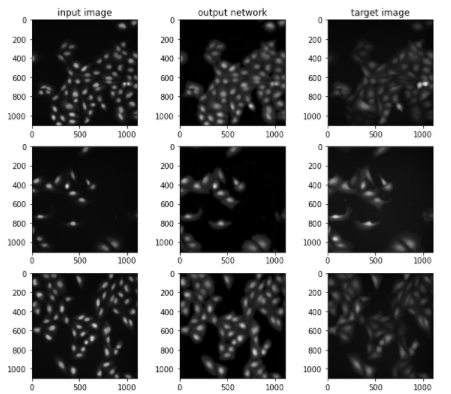

- training on d02 images also works without problems, even better loss-scores (loss: 0.2803, val_loss: 0.2671, with 15 epochs, batch-size 13), model saved as test_model_d02 (*add path*) 
    - images look not that good, but ok for first try 
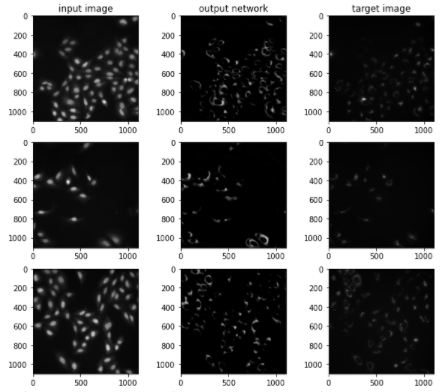

__Next steps__
- make one model that predicts both output channels
- automated reading of images